## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page) [Variables and Why](#1.-Variables-and-Why)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.[Clean-up](#2.-Clean-up)
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

## 1. Variables and Why

The variables I decided to choose for mine was:
* year
* occupation
* industry
* web usage
* computer usage
* happiness
* relationship happiness

The questions I thought of asking here was the question of correlation. Is computer usage correlated with relationship happiness or general happiness. There's the narrative now-a-days that say high computer usage is extremely detrimental to a person's happiness. That is a causal narrative that X computer usage leads to Y unhappiness, but I'm moreso just looking to confirm the correlation fact rather than the causal fact. It might just be that people who are unhappy are because of their environmental factors and by circumstance really have nothing better to than, so they spend their time on the internet. I also want to observe the counterfactual of people who use a lot of the internet and are actaully happy.

Another question that I want to answer then is similarly how related thta is to relationship happiness. Something like if you are on the internet too much that makes you spend less time with your partner, therefore computer usage leads to unhappiness in relationships. But, the interesting thing is again the counterfactual, computer usage leading to happiness in a relationship. This could be the case if 1. the person was talking to an ai boy/girlfriend or 2. it is a long distance relationship. I don't know if chatbots were widely available or they have more recent data on that, but it would be something interest to look at and see if it exists.

I added industry and occupation on to there because it would make sense to split-up or segment by occupation or job. A person that works in IT would probably be happy using a computer all the time because they get paid to do so. I am moreso interested in the case of "leisurely" usage of the internet, which is web/computer usage in someones free-time in relation to the other variables. Also, the pressupossition here is that even then IT workers also enjoy computer science as a hobby and will obviously be happy correlated with computer usage. Although, there can be hardcore hobbyists or lonely people that work in different industries.

## 2. Clean-up

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_excel("data/GSS.xlsx")
df.head(1)

,year,id_,occ10,indus10,happy,hapcohab,compuse,wwwhr,ballot
0,1972,1,"Wholesale and retail buyers, except farm products",Clothing stores,Not too happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [53]:
def no_answer(string):
    if string == ".i:  Inapplicable":
        return True
    elif string == ".n:  No answer":
        return True
    elif string == ".d:  Do not Know/Cannot Choose":
        return True
    elif string == ".s:  Skipped on Web":
        return True
    return False

# only drop in happy and uses internet to see if results change
print(df.shape)
df = df[~df["happy"].map(no_answer)]
df = df[~df["wwwhr"].map(no_answer)]
print(df.shape)

# uncomment out for same results but with people in a relationship
# print(df.shape)
# df = df[~df.map(no_answer).any(axis=1)] # drop any row that skipped answering the questions
# print(df.shape)

# check for any more cleaning
print(df.isna().sum())

(72390, 9)
(15450, 9)
year        0
id_         0
occ10       0
indus10     0
happy       0
hapcohab    0
compuse     0
wwwhr       0
ballot      0
dtype: int64


In [54]:
df.dtypes

year         int64
id_          int64
occ10       object
indus10     object
happy       object
hapcohab    object
compuse     object
wwwhr       object
ballot      object
dtype: object

In [3]:
# for i in range(df.shape[1]): # uncomment for the reviewier output is too long
    # print(pd.unique(df.iloc[:,i])) # found that wwwhr took "other" so i need to clean that

In [56]:
df['wwwhr'] = df['wwwhr'].apply(lambda x: x.replace("hours", "") if "hours" in x else x)
df['wwwhr'] = pd.to_numeric(df['wwwhr'])
print(df.shape)

(15450, 9)


In [57]:
no_usage_df = df[(df["wwwhr"] == 0)]
df = df[~(df["wwwhr"] == 0)] # remove if you don't use the inter


## 3. Exploration

In [4]:
# for i in range(df.shape[1]): # uncomment for the reviewier output is too long
#     print(pd.Series(df.iloc[:,i]).value_counts()) # found that wwwhr took "other" so i need to clean that
#     print("=" * 20)

Pretty happy --
5.123963979403259
Very happy :
5.123963979403259
Not too happy -
5.123963979403259


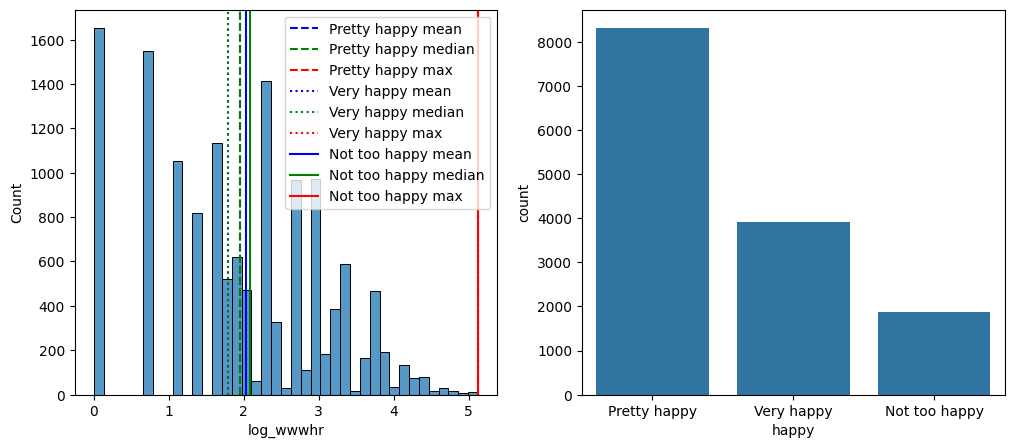

In [59]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
df["log_wwwhr"] = np.log(df["wwwhr"])

sns.histplot(data=df, x="log_wwwhr",ax=ax[0])
order = ["Pretty happy", "Very happy", "Not too happy"]
lines = ["--",":","-"] # dashed = happy, dotted = yay, 
sns.countplot(data=df, x="happy", ax=ax[1], order=order)

for level,line in zip(order,lines):
    print(level,line)
    level_mean = df[df["happy"] == level]["log_wwwhr"].mean()
    level_median = df[df["happy"] == level]["log_wwwhr"].median()
    level_max = df[df["happy"] == level]["log_wwwhr"].max()
    ax[0].axvline(level_mean, linestyle=line, color="b", label=f"{level} mean")
    ax[0].axvline(level_median, linestyle=line, color="g", label=f"{level} median")
    print(level_max)
    ax[0].axvline(level_max, linestyle=line, color="r", label=f"{level} max")

ax[0].legend(loc="upper right")

In [60]:
df["wwwhr"].sort_values()

38308      1
38326      1
61314      1
61320      1
38193      1
        ... 
67489    168
71155    168
60620    168
55820    168
71192    168
Name: wwwhr, Length: 14102, dtype: int64

In [61]:
df[df["log_wwwhr"] == 5.123963979403259] # computer usage isn't related to happyness, its probably your career than anything

,year,id_,occ10,indus10,happy,hapcohab,compuse,wwwhr,ballot,log_wwwhr
53232,2010,190,Computer network architects,Motor vehicles and motor vehicle equipment man...,Pretty happy,.i: Inapplicable,YES,168,Ballot b,5.123964
55820,2012,734,Market research analysts and marketing special...,"Other professional, scientific, and technical ...",Very happy,.i: Inapplicable,YES,168,Ballot b,5.123964
60620,2016,1022,Waiters and waitresses,Restaurants and other food services,Not too happy,.i: Inapplicable,YES,168,Ballot b,5.123964
67489,2021,2947,"Computer, automated teller, and office machine...",Internet publishing and broadcasting and web s...,Pretty happy,.i: Inapplicable,YES,168,Ballot b,5.123964
71155,2022,2310,Cooks,Restaurants and other food services,Very happy,.i: Inapplicable,YES,168,Ballot a,5.123964
71192,2022,2347,Order clerks,National security and international affairs,Very happy,.i: Inapplicable,YES,168,Ballot a,5.123964
71963,2022,3118,Customer service representatives,Grocery stores,Pretty happy,Pretty happy,NO,168,Ballot b,5.123964


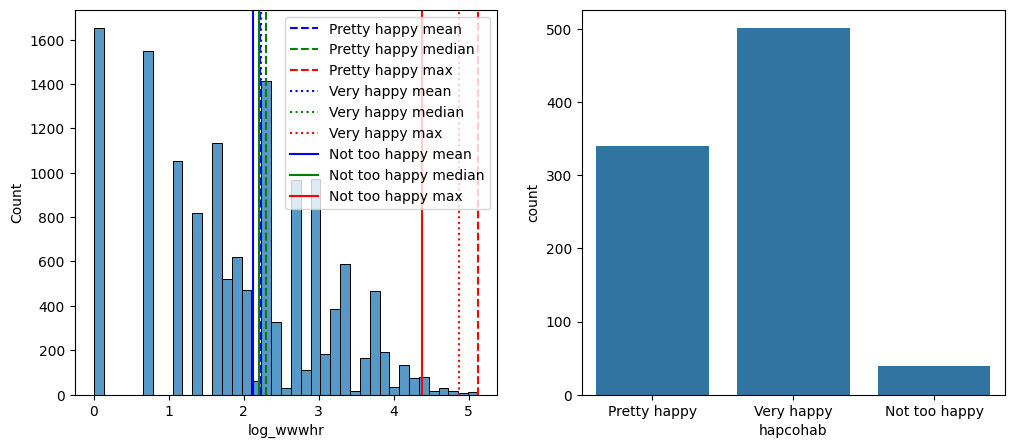

In [62]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=df, x="log_wwwhr",ax=ax[0])
order = ["Pretty happy", "Very happy", "Not too happy"]
lines = ["--",":","-"] # dashed = happy, dotted = yay, 
sns.countplot(data=df, x="hapcohab", ax=ax[1], order=order)

for level,line in zip(order,lines):
    level_mean = df[df["hapcohab"] == level]["log_wwwhr"].mean()
    level_median = df[df["hapcohab"] == level]["log_wwwhr"].median()
    level_max = df[df["hapcohab"] == level]["log_wwwhr"].max()
    ax[0].axvline(level_mean, linestyle=line, color="b", label=f"{level} mean")
    ax[0].axvline(level_median, linestyle=line, color="g", label=f"{level} median")
    ax[0].axvline(level_max, linestyle=line, color="r", label=f"{level} max")

ax[0].legend(loc="upper right")

<Axes: >

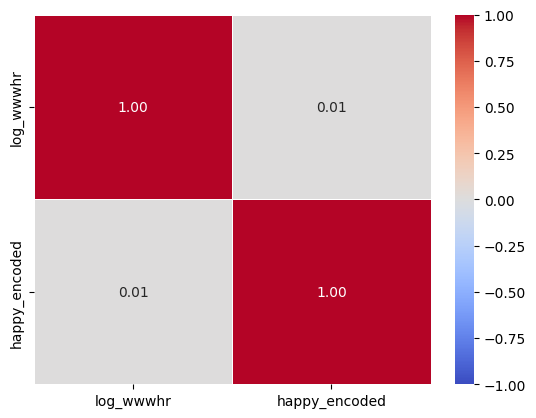

In [63]:
happy_mapping = {"Pretty happy":2, "Very happy":1, "Not too happy": 0}
hapcohab_mapping = {"Pretty happy":2, "Very happy":1, "Not too happy": 0}


df['happy_encoded'] = df['happy'].map(happy_mapping)
# df['hapcohab_encoded'] = df['hapcohab'].map(hapcohab_mapping)

sns.heatmap(df[["log_wwwhr","happy_encoded"]].corr(),annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

## Factoring Industry In Now

So the previous analysis basically just said 1 thing, your happiness is related to the happiness of a relationship.

I also realize now that I dropped the single people without a relationship, so that might effect it as well.


In [64]:
df.sort_values(by="wwwhr", ascending=False)[["indus10","wwwhr"]][:100].value_counts()

indus10                                       wwwhr
.i:  Inapplicable                             98       2
Computer systems design and related services  80       2
                                              100      2
Restaurants and other food services           168      2
                                              100      2
                                                      ..
Traveler accommodation                        84       1
                                              90       1
                                              120      1
Truck transportation                          100      1
U.S. Navy                                     100      1
Name: count, Length: 94, dtype: int64

In [65]:
df.sort_values(by="wwwhr", ascending=False)[["occ10","wwwhr"]][:100].value_counts()

occ10                                                   wwwhr
.i:  Inapplicable                                       98       2
Laborers and freight, stock, and material movers, hand  100      2
.n:  No answer                                          110      1
Accountants and auditors                                120      1
Architectural and engineering managers                  96       1
                                                                ..
Waiters and waitresses                                  85       1
                                                        168      1
Web developers                                          100      1
                                                        112      1
Writers and authors                                     120      1
Name: count, Length: 98, dtype: int64

## Ideas while writing Findings

<Axes: xlabel='happy', ylabel='count'>

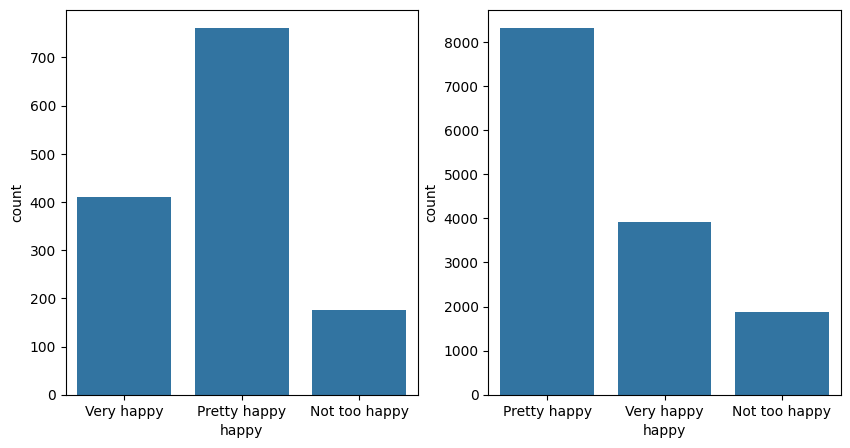

In [66]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=no_usage_df, x= "happy", ax=ax[0])
sns.countplot(data=df, x= "happy", ax=ax[1])

In [67]:
no_usage_df["happy"].value_counts(normalize=True)

happy
Pretty happy     0.564540
Very happy       0.304896
Not too happy    0.130564
Name: proportion, dtype: float64

In [68]:
df["happy"].value_counts(normalize=True)

happy
Pretty happy     0.589916
Very happy       0.277124
Not too happy    0.132960
Name: proportion, dtype: float64

## Findings

After the visualizations and trying both a dataset where there is single and people in relationships along with only people in relationships. Web usage does not seem to have any causal effect on whether or not you as a person is happy or if you are happy with your relationship. There is a more controversial variable to look at which is "sexual content" viewership or high chat-room usage that are larger signals for unhappiness. I think I can also claim causal effect because my dataset contains people who do not use the internet at all and inputted a 0 in for the survey. I wonder if people who don't use the web at all are substantially more happier than the people that do. 

Just ran it and came back here, the seemingly answer is nope. There is't much of a different between the happiness of a non-web user and the happiness of a web-user. Maybe it would be interesting to see the reverse partition, by happiness to try and understand the other direction of the causal arrow. The main finding though is that it doesn't matter what your web-usage is, but it was also hard to separate "work" web-usage and leisurely web-usage. My intepretation of these results is that if a job forces you to sit at a screen for a long time, make sure it pays you well. The second interpretation of the results between web-usage and happiness is again, find a good job that probably pays you well so that you, or you and your significant other can be happy. If anything, the previous research on income and happiness is what is really shining through here. The only person unhappy about staring at a screen or using the web the most was a grocery worker standing in front of a register for the entire week. That says something. 

On my other question of computer usage and relationship happiness, I faced the same problem as discussed above. There wasn't a variable here to say whether or not the usage was at work or at home and that makes a lot of difference. If a person is on the computer playing games to avoid talking to their significant other or just not talking to their significant other, it would make sense how that then would cause decrease happiness in the relationship. Another point there is that even then it still might not be clear because it is being reported from the point-of-view of the computer user. You would need to bring in the significant other to get their report on the relationship as well to get the full story. I mean of course you would be happy if you were allowed to play games all day or the surf the web while your partner made you food or do all the chores around the house.

TLDR: **inconclusive**